In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [1]:
import sqlite3
import os
import random

In [2]:
db_path = '/home/wsyj/dissertation__recommendation_system__experiment_2/dissertation__recommendation_system__experiment/my_metrics.db'
cx = sqlite3.connect(db_path)
cur = cx.cursor()

In [3]:
cur.execute('SELECT name FROM sqlite_master')
cur.fetchall()

[(u'tmp',),
 (u'tmp2',),
 (u'metrics',),
 (u'sqlite_sequence',),
 (u'metrics_N_20',),
 (u'metrics_N_20__iter_4__batch_words_1',),
 (u'metrics_N_20__iter_4__batch_words_10000',),
 (u'metrics_N_20__iter_4__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_5__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_10__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_20__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_40__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_80__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_60__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_30__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio_tiratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'metrics__normalized_user_repr__N_20__iter_35__batch_words_10000__da_1M',),
 (u'metrics__normalized_user_repr__N_20__iter_30__batch_words_10000__da_1M',),
 (u'metrics__chap4_exp2_

In [4]:
table_name = 'metrics__chap4_exp_X_mc__N_20___da_1M'

cur.execute('select * from %s' % (table_name))
r = cur.fetchall()



In [6]:
for x in r:
    print x

(1, u'1', u'rating_tfidf', 0, u'CF', 0, 5, 100, 0.025, 5, 10, 20, 0.3254166666666667, 0.04886717014660151, 0.08497396924181676, u'2017-04-08 21:04:47')
(2, u'1', u'rating_tfidf', 0, u'CF', 300, 5, 100, 0.025, 5, 10, 20, 0.3139166666666667, 0.047140238141420716, 0.0819710479216194, u'2017-04-08 21:05:09')
(3, u'1', u'rating_tfidf', 0, u'CF', 600, 5, 100, 0.025, 5, 10, 20, 0.3064799331103679, 0.0458700671376102, 0.07979710570857891, u'2017-04-08 21:05:27')
(4, u'1', u'rating_tfidf', 0, u'CF', 900, 5, 100, 0.025, 5, 10, 20, 0.3069737954353339, 0.04544459113633377, 0.07916896027381581, u'2017-04-08 21:05:42')
(5, u'1', u'rating_tfidf', 0, u'CF', 1200, 5, 100, 0.025, 5, 10, 20, 0.2955907534246575, 0.043204585129613754, 0.07538991489292012, u'2017-04-08 21:05:56')
(6, u'1', u'rating_tfidf', 0, u'CF', 1500, 5, 100, 0.025, 5, 10, 20, 0.29118432769367764, 0.04092078012276234, 0.0717573416867364, u'2017-04-08 21:06:09')
(7, u'1', u'rating_tfidf', 0, u'CF', 1800, 5, 100, 0.025, 5, 10, 20, 0.27415

In [17]:
target_index = 5
horizontal_coordinates = [x[target_index] for x in r]

In [18]:
indexes = [-4, -3, -2]
precision_list, recall_list, f1_list = ([x[index] for x in r] for index in indexes)

In [14]:
precision_list

[0.3254166666666667,
 0.3139166666666667,
 0.3064799331103679,
 0.3069737954353339,
 0.2955907534246575,
 0.29118432769367764,
 0.27415215398716775,
 0.3085034013605442,
 0.40555555555555556]

In [32]:
x_label = u'流行度阈值mc'
y_label = u'推荐效果评估指标'

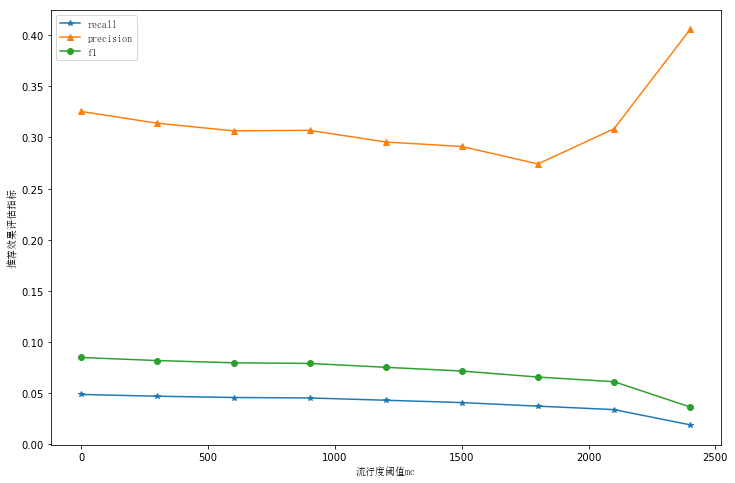

In [38]:

prop = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')
plt.plot(horizontal_coordinates, recall_list, label=u'recall', marker='*')
plt.plot(horizontal_coordinates, precision_list, label=u'precision', marker='^')
plt.plot(horizontal_coordinates, f1_list, label=u'f1', marker='o')
plt.legend( prop=prop )
plt.xlabel(x_label, fontproperties=prop ) 
plt.ylabel(y_label, fontproperties=prop)

# setting graph size
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)

plt.show()

In [ ]:
"""Code above is for poking-around purpose. Code below will be more serious."""

In [76]:
def draw_graph(table_name, target_index, value_index_list, x_label, y_label, label_list, marker_list):
    assert(len(value_index_list) == len(label_list))
    assert(len(label_list) == len(marker_list))
    
    #table_name = 'metrics__chap4_exp_X_mc__N_20___da_1M'

    cur.execute('select * from %s' % (table_name))
    r = cur.fetchall()

    #target_index = 5
    horizontal_coordinates = [x[target_index] for x in r]

    #value_index_list = [-4, -3, -2]
    #precision_list, recall_list, f1_list = ([x[index] for x in r] for index in value_index_list)
    value_list_list = [[x[index] for x in r] for index in value_index_list]
    

    #x_label = u'流行度阈值mc'
    #y_label = u'推荐效果评估指标'

    fig1 = plt.figure()
    
    #plt.plot(horizontal_coordinates, recall_list, label=u'recall', marker='*')
    #plt.plot(horizontal_coordinates, precision_list, label=u'precision', marker='^')
    #plt.plot(horizontal_coordinates, f1_list, label=u'f1', marker='o')
    
    ax1 = None
    for value_list, label, marker in zip(value_list_list, label_list, marker_list):
        ax1 = fig1.add_subplot(111)
        ax1.plot(horizontal_coordinates, value_list, label=label, marker=marker)
        
    prop = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')
    
    ax1.legend( prop=prop )
    
    ax1.set_xlabel(x_label, fontproperties=prop ) 
    ax1.set_ylabel(y_label, fontproperties=prop)

    # setting graph size
    fig = plt.gcf()
    fig.set_size_inches(12, 8, forward=True)

    plt.savefig('fig__' + x_label + '__' + y_label + '.png')
    plt.show()
    

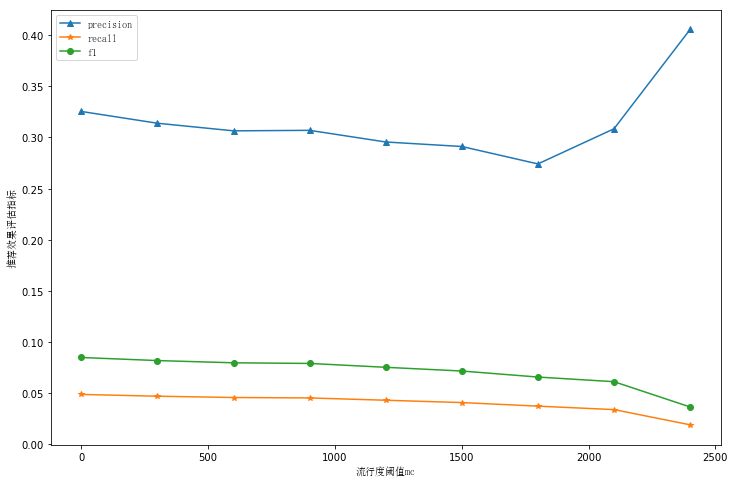

In [77]:

target_index = 5
table_name = 'metrics__chap4_exp_X_mc__N_20___da_1M'
x_label = u'流行度阈值mc'

y_label = u'推荐效果评估指标'
value_index_list = [-4, -3, -2]
label_list = ["precision", "recall", "f1"]
marker_list = ["^", "*", "o"]
draw_graph(table_name, target_index, value_index_list, x_label, y_label, label_list, marker_list)


x_label: 流行度阈值mc
y_label: 推荐效果评估指标


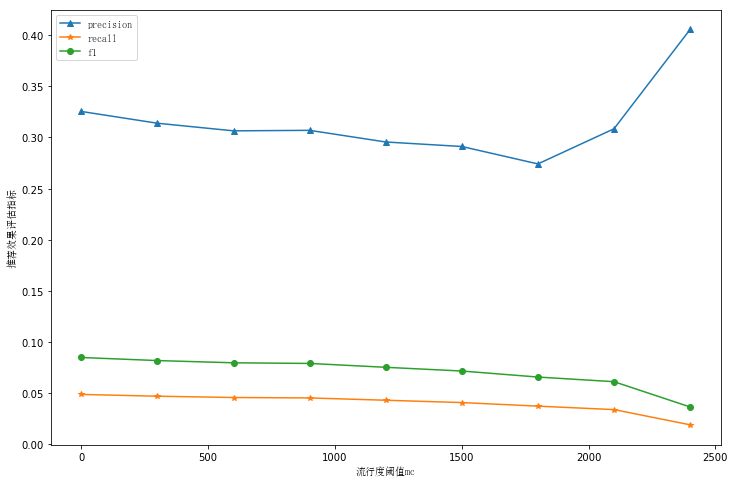

x_label: 窗口大小w
y_label: 推荐效果评估指标


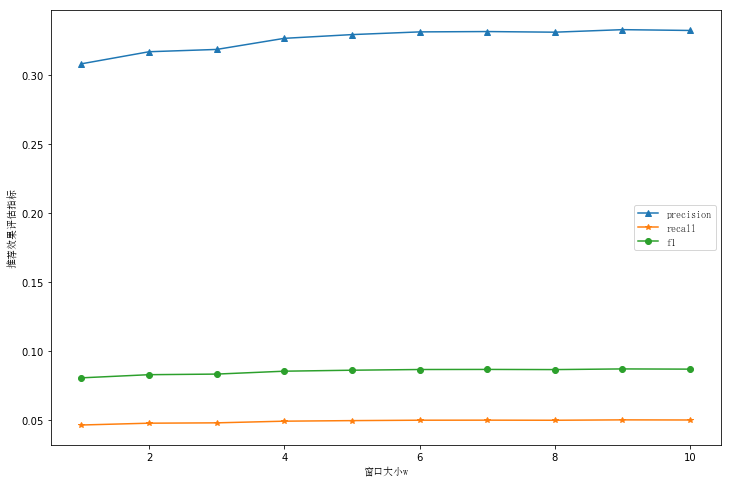

x_label: 隐藏层神经元数目N
y_label: 推荐效果评估指标


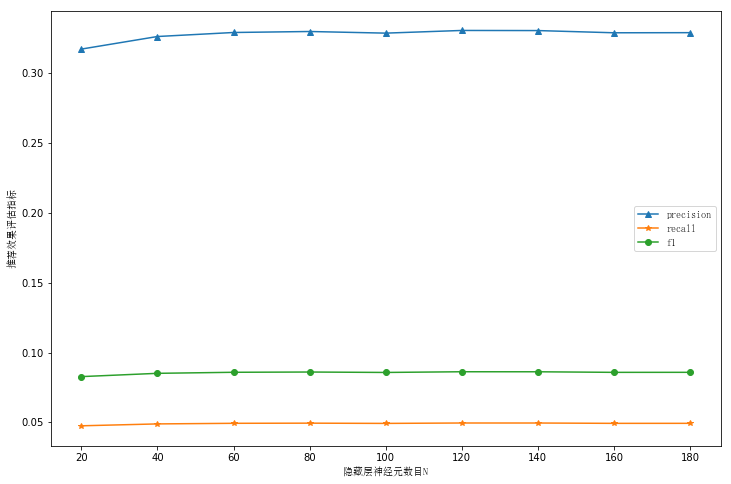

x_label: 学习率α
y_label: 推荐效果评估指标


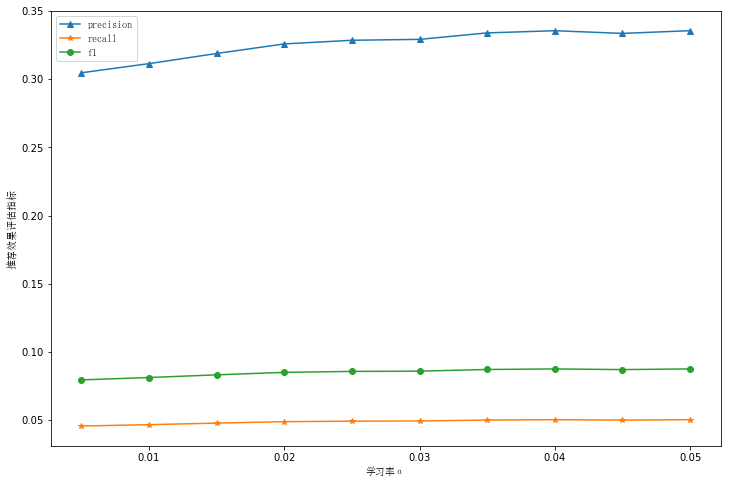

x_label: 迭代次数
y_label: 推荐效果评估指标


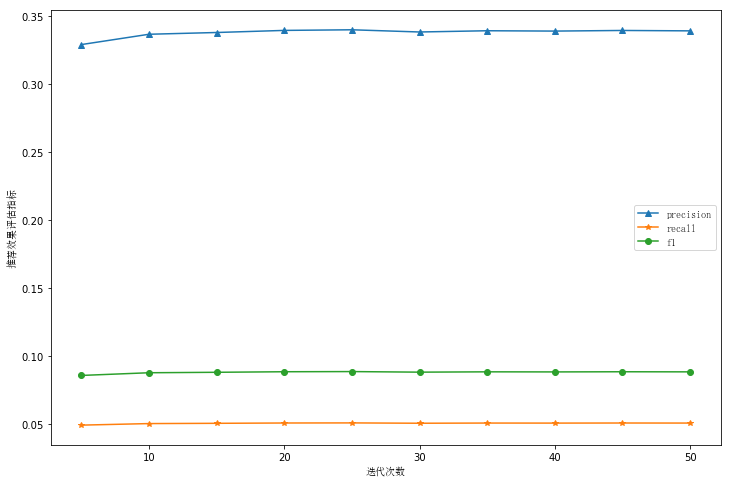

x_label: 邻居集大小K
y_label: 推荐效果评估指标


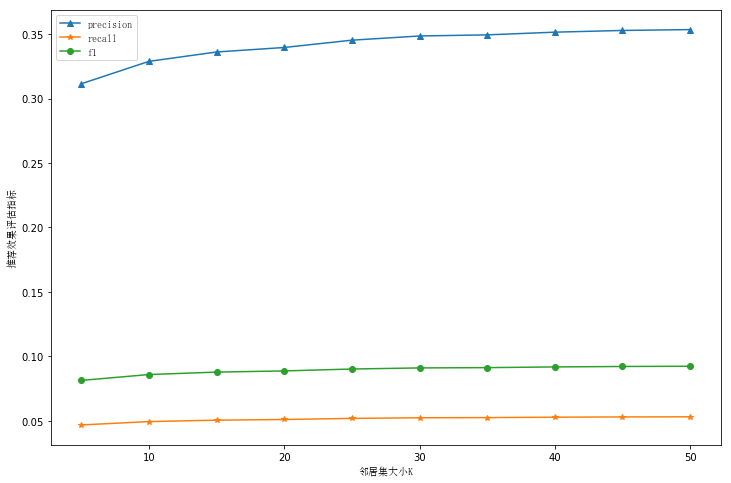

In [72]:

meta_data = [
    (u'metrics__chap4_exp_X_mc__N_20___da_1M',               5,   u'流行度阈值mc'     ),
    (u'metrics__chap4_exp_X_window__N_20___da_1M',           6,   u'窗口大小w'        ),
    (u'metrics__chap4_exp_X_size__N_20___da_1M',             7,   u'隐藏层神经元数目N' ),
    (u'metrics__chap4_exp_X_learning_rate__N_20___da_1M',    8,   u'学习率α'          ),
    (u'metrics__chap4_exp_X_iter__N_20___da_1M',             9,   u'迭代次数'         ),
    (u'metrics__chap4_exp_X_K__N_20___da_1M',                10,  u'邻居集大小K'      ),
]
for one_piece in meta_data:
    table_name, target_index, x_label = one_piece
    
    draw_graph(table_name, target_index, value_index_list, x_label, y_label, label_list, marker_list)
